In [1]:
from selenium import webdriver      
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests
from bs4 import BeautifulSoup



#browser = webdriver.Firefox()#Chrome('./chromedriver.exe')
YOUTUBER_HOME_PAGE_URL = "https://www.youtube.com/channel/UCboMX_UNgaPBsUOIgasn3-Q/videos"
PATIENCE_TIME = 60
LOAD_MORE_BUTTON_XPATH = '//*[@id="browse-itemsprimary"]/li[2]/button/span/span[2]' 

driver = webdriver.Chrome('/Users/DTrinh/Desktop/python_folder/chromedriver')
driver.get(YOUTUBER_HOME_PAGE_URL)
html_old = 0
html_new = 0
while True:
    try:
        html_old = html_new
        loadMoreButton = driver.find_element_by_xpath("//button[contains(@aria-label,'Load more')]")
        time.sleep(2)
        loadMoreButton.click()
        time.sleep(5)
        html = driver.page_source
        html_new = len(html)
        if html_old == html_new:
            break
    except Exception as e:
        print (e)
        
        break
print ("Complete")
time.sleep(10)
driver.quit()



Message: no such element: Unable to locate element: {"method":"xpath","selector":"//button[contains(@aria-label,'Load more')]"}
  (Session info: chrome=56.0.2924.87)
  (Driver info: chromedriver=2.27.440174 (e97a722caafc2d3a8b807ee115bfb307f7d2cfd9),platform=Mac OS X 10.11.3 x86_64)

Complete


In [51]:
import numpy as np
import pandas as pd
import re

soup = BeautifulSoup(html, 'lxml')
g_data = soup.find_all('div', {'class': 'yt-lockup-content'})

title_list = []
data_list = []
for item in g_data:
    #print (item.contents[1].text)
    title = item.find_all('h3', {'class': 'yt-lockup-title'})
    #print(title[0].text)
    title_list.append(str(title[0].text))
    mdata = item.find_all('ul', {'class': 'yt-lockup-meta-info'})
    #print(mdata[0].text)
    data_list.append(str(mdata[0].text))
    
    
names = []
types = []
length = []
for x in title_list:
    x = x.split(' - ')
    if 'Gameplay' in x[0]:
        names.append('blank')
        types.append(x[0])
        length.append([x[1]])
    elif 'Duration' in x[1]:
        names.append(x[0])
        types.append('MISC')
        length.append(x[1])
    else:
        names.append(x[0])
        types.append(x[1])
        try:
            length.append(x[2])
        except:
            length.append('missing')
            
views = []
date = []
for i in data_list:
    i = i.split(' views')
    views.append(int(i[0].replace(',', '')))
    date.append(i[1])
            
df = pd.DataFrame()
df['Title'] = names
new_types = []
for x in types:
    x = x.split(' #')
    new_types.append(x[0])
title_types = []
for x in new_types:
    title_types.append(x.title())
    

types3 = []
for x in title_types:
    x = x.split(' Part')
    types3.append(x[0])
    
types_final = []
for x in types3:
    x = x.strip('')
    #print(repr(x))
    if x == 'Funhaus Dungeons And Dragons':
        types_final.append('Funhaus Dungeons & Dragons')
    else:
        types_final.append(x)
df['Type'] = types_final
#print(df['Type'])
    

df['Length'] = length
df['views'] = views

df['date'] = date

df_test  =df[df['Type'].str.contains('Funhaus Dungeons & Dragons')]
#print(df['Length'])


In [52]:
from collections import Counter

totals = {}
for x in types_final:
    if x in totals:
        totals[x] += 1
    else:
        totals[x] = 1
        

newA = (Counter(totals).most_common(11))
#print(totals)
print(len(totals))
print(newA)
topfive = []
top_views = []
for x in newA:
    topfive.append(x[0])
    top_views.append(x[1])
    
topfive.remove('Misc')
topfive.remove('Funhaus Shorts')
topfive.append('Hitman Blood Money Gameplay')
#top_views.remove(44)
print(topfive)


total_views = df['views'].sum(axis = 0)

total_videos = len(df['Title'])

percent_views = []
for x in views:
    percent_views.append(x/total_views)
    
df['Percent Views'] = percent_views


251
[('Gta 5 Gameplay', 124), ('Open Haus', 104), ('Demo Disk Gameplay', 102), ('Dude Soup Podcast', 102), ('Funhaus Comments', 57), ('Misc', 44), ('Wheelhaus Gameplay', 22), ('Funhaus Dungeons & Dragons', 20), ('Overwatch Gameplay', 13), ('Faq Podcast', 12), ('Funhaus Shorts', 11)]
['Gta 5 Gameplay', 'Open Haus', 'Demo Disk Gameplay', 'Dude Soup Podcast', 'Funhaus Comments', 'Wheelhaus Gameplay', 'Funhaus Dungeons & Dragons', 'Overwatch Gameplay', 'Faq Podcast', 'Hitman Blood Money Gameplay']


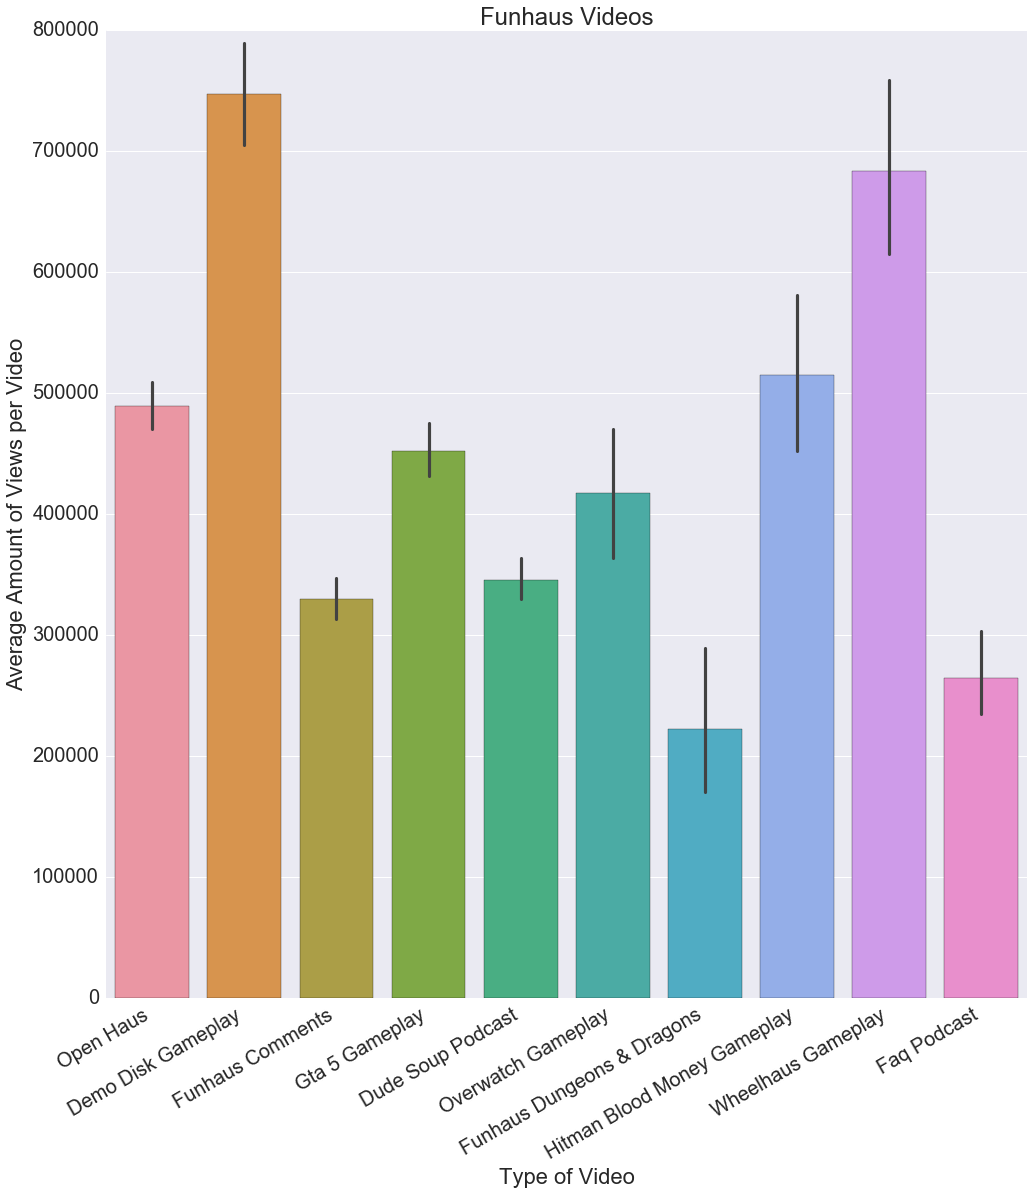

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#df_top_five = df[(df['Type'].str.contains('|'.join(topfive)))]
df_top_five = df[(df['Type'].isin(topfive))]
#print(df_top_five)
sns.set(font_scale=2)
g = sns.factorplot(x='Type', y = 'views', data = df_top_five, #views or Percent Views
                   estimator = np.mean, 
                   size = 15, kind = 'bar')
                   #np.sum, np.mean, np.median, np.count_nonzero, np.stdetc
g.set(xlabel='Type of Video', ylabel='Average Amount of Views per Video', title = 'Funhaus Videos')
g.set_xticklabels(rotation=30, ha='right')
df_test = df[(df['Type'].str.contains('MISC'))]        
#print(df_test['Percent Views'].sum())
#print(df_test)

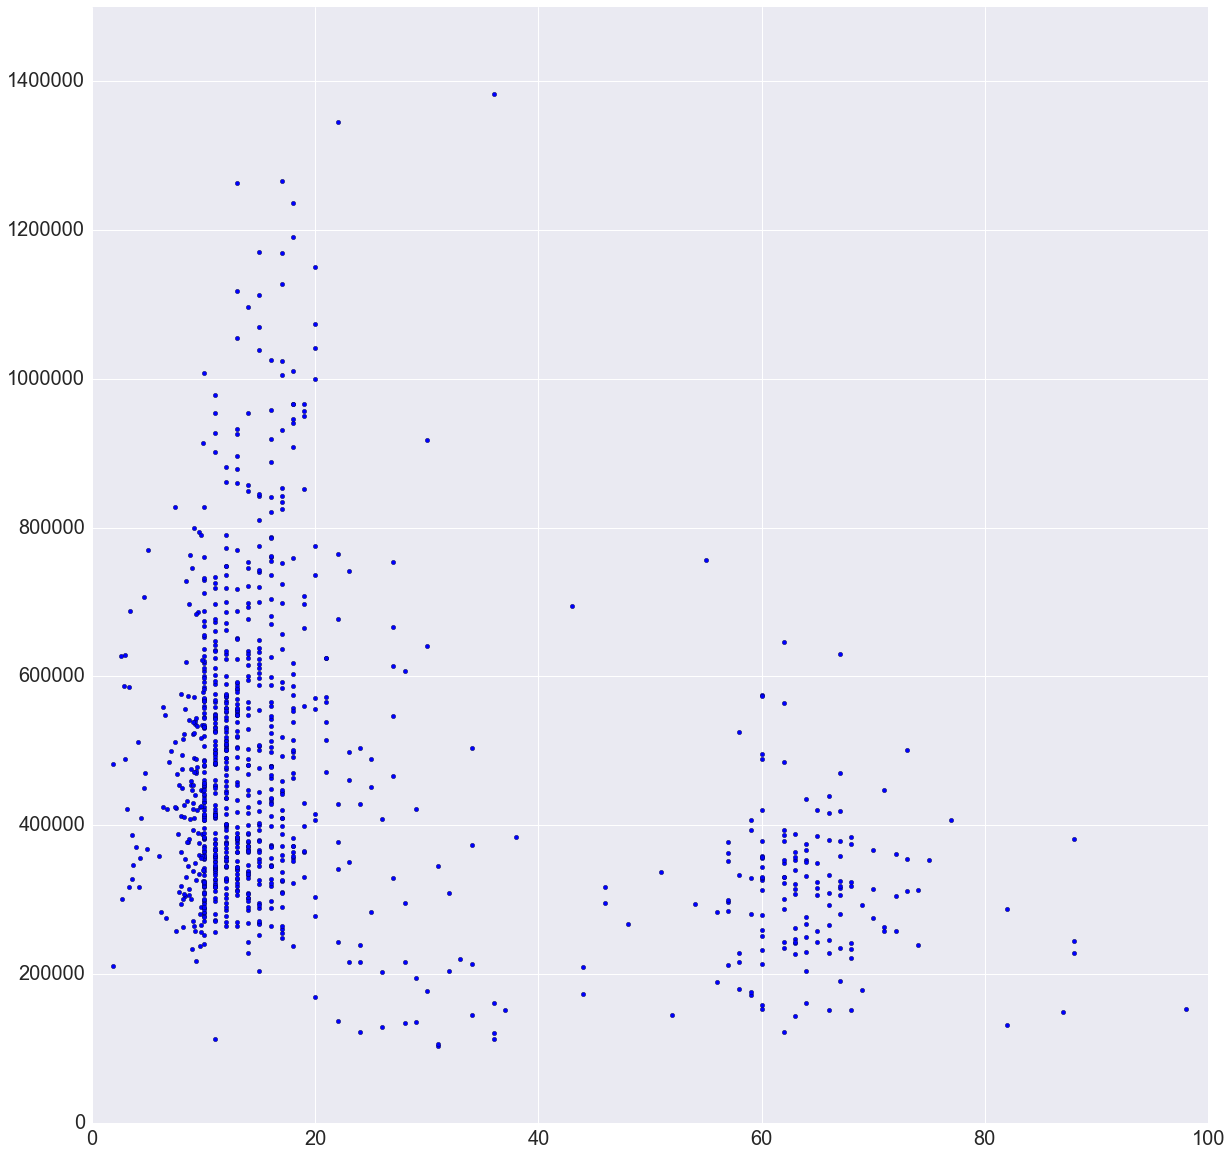

In [73]:
#print(df['Length'])
#df['length'] = length(this is the list to modify)

%matplotlib inline

new_lengths = []
for x in length:
    total = 0
    x = str(x)
    x = x.split('Duration: ')
    s = x[1].split(',')
    for i in s:
        if 'hour' in i:
            d = re.findall('\d+', i)
            total = total + (int(d[0]) * 3600)
        elif 'minutes' in i:
            d = re.findall('\d+', i)
            total = total + (int(d[0]) * 60)
        elif 'seconds' in i:
            d = re.findall('\d+',i)
            total = total + int(d[0])
        #print(d)
    new_lengths.append(total/60)


df['New Lengths'] = new_lengths
#print(df[['Length', 'New Lengths']])
plt.figure(figsize=(20,20))
plt.xlim(0, 100.0)
plt.ylim(0,1500000)
plt.scatter(df['New Lengths'], df['views'])

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 10 or scalar

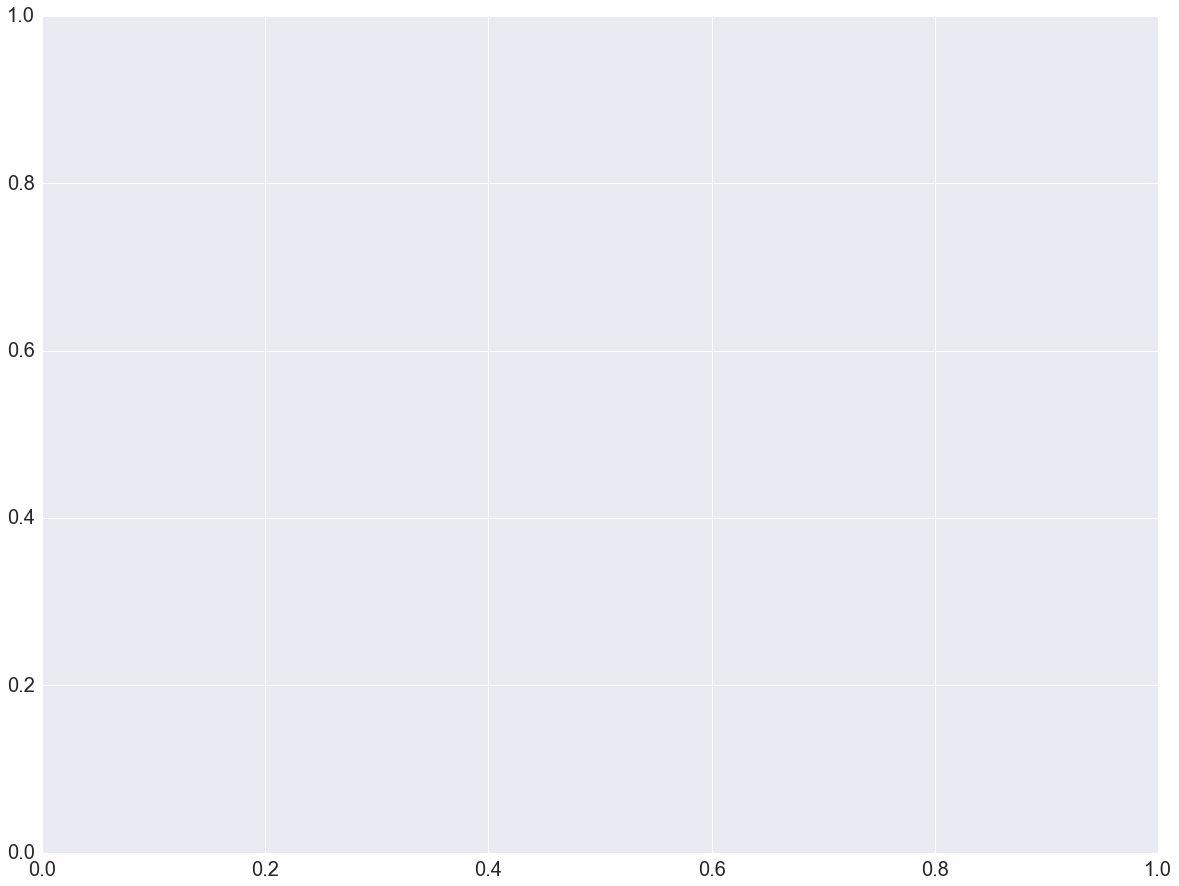

In [13]:
%matplotlib inline

plt.figure(figsize=(20,15))
plt.bar(range(len(topfive)), top_views)
plt.xticks(range(len(topfive)), topfive)
plt.show()

print('complete')

456336626
test


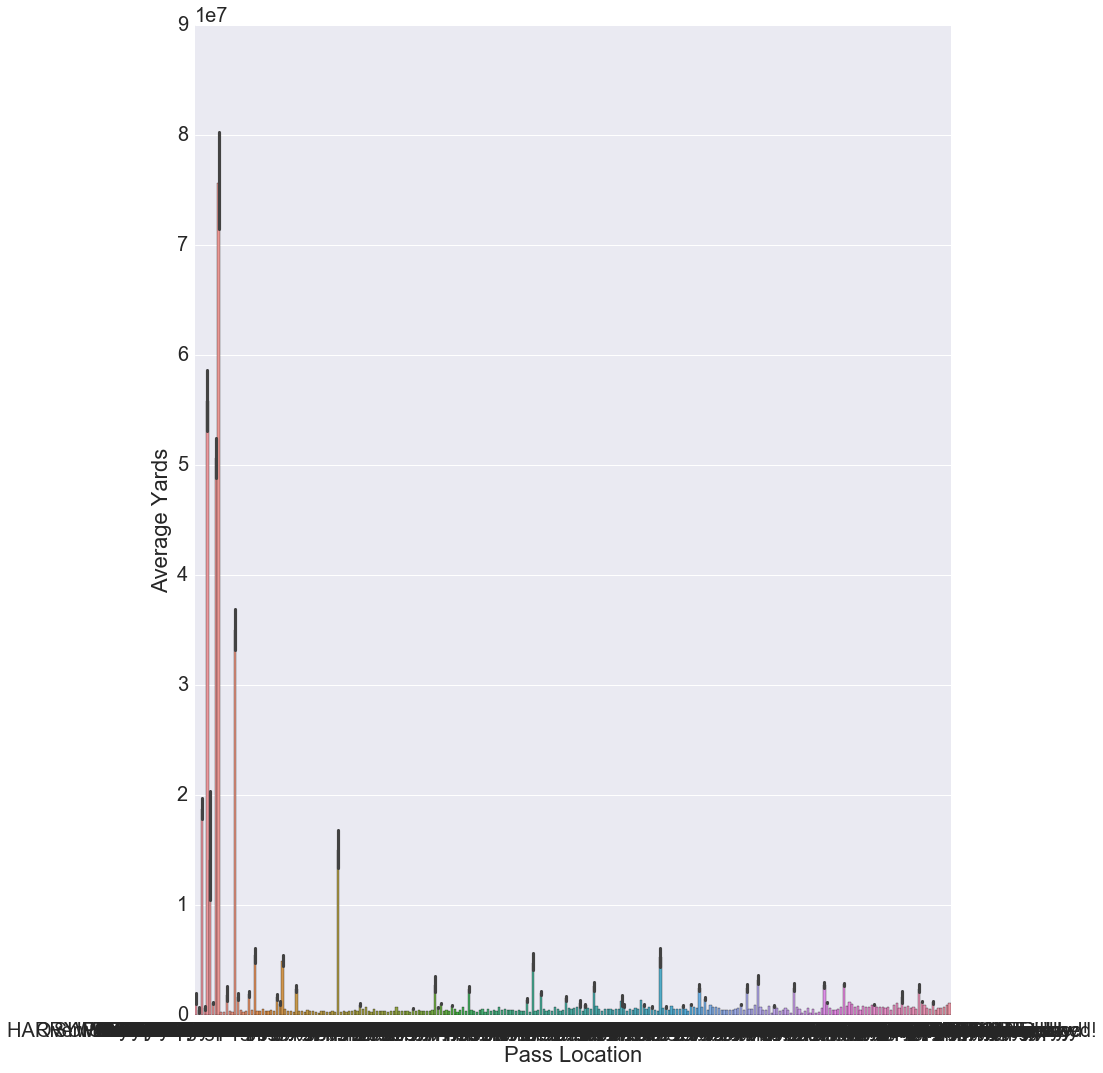

In [6]:
print((df['views'].sum(axis=0)))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

g = sns.factorplot(x= 'Type', y = 'views', data = df,
                   estimator = np.sum, size = 15, kind = 'bar')
g.set(xlabel='Pass Location', ylabel='Average Yards')


print('test')


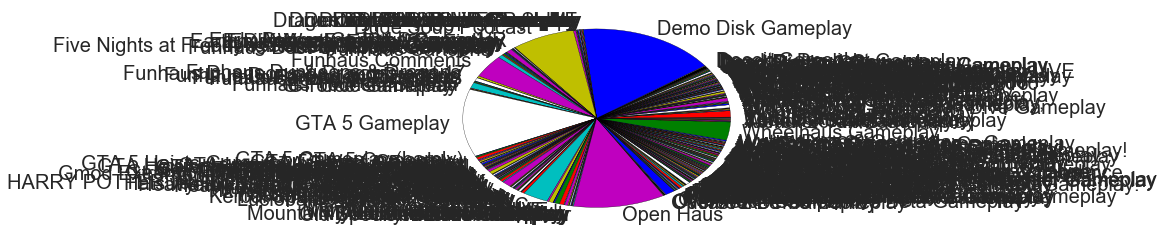

In [7]:

sums = df.views.groupby(df.Type).sum()

plt.pie(sums, labels=sums.index);
plt.figure(figsize=(10000,10000))
plt.show()